IMPORTING LIBRARIES

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
data=pd.read_csv('/content/framingham.csv') #reading the dataset

In [66]:
data.head() #top 5 rows of dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [67]:
data.columns #column names

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [68]:
data.shape #shape of dataset

(4240, 16)

In [69]:
#  drop the education features from dataset as it doesn not affect
data = data.drop('education', axis=1)
data.head() #top 5 rows


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [70]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [71]:
data.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


In [72]:
data.dropna(inplace=True)
data.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


In [73]:
data.shape

(3751, 15)

Normalizing the dataset

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features to normalize
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the numerical features and transform the data
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the normalized data
data.head()


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.184211,0,0.000000,0.0,0,0,0,0.140652,0.106383,0.232804,0.277024,0.363636,0.104520,0
1,0,0.368421,0,0.000000,0.0,0,0,0,0.234991,0.177305,0.349206,0.319680,0.515152,0.101695,0
2,1,0.421053,1,0.285714,0.0,0,0,0,0.226415,0.208038,0.338624,0.237518,0.313131,0.084746,0
3,0,0.763158,1,0.428571,0.0,0,1,0,0.192110,0.314421,0.497354,0.316045,0.212121,0.177966,1
4,0,0.368421,1,0.328571,0.0,0,0,0,0.295026,0.219858,0.380952,0.183228,0.414141,0.127119,0


SEPARATING FEATURES AND TARGET VARIABLE

In [75]:
X=data.drop('TenYearCHD',axis=1)
y=data['TenYearCHD']
#spliiting into features and target variable
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add a column of ones for the intercept

In [76]:
X.shape

(3751, 15)

In [77]:
X = pd.DataFrame(X) # Convert X back to a Pandas DataFrame
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,1.0,0.184211,0.0,0.000000,0.0,0.0,0.0,0.0,0.140652,0.106383,0.232804,0.277024,0.363636,0.104520
1,1.0,0.0,0.368421,0.0,0.000000,0.0,0.0,0.0,0.0,0.234991,0.177305,0.349206,0.319680,0.515152,0.101695
2,1.0,1.0,0.421053,1.0,0.285714,0.0,0.0,0.0,0.0,0.226415,0.208038,0.338624,0.237518,0.313131,0.084746
3,1.0,0.0,0.763158,1.0,0.428571,0.0,0.0,1.0,0.0,0.192110,0.314421,0.497354,0.316045,0.212121,0.177966
4,1.0,0.0,0.368421,1.0,0.328571,0.0,0.0,0.0,0.0,0.295026,0.219858,0.380952,0.183228,0.414141,0.127119


TRAIN TEST SPLIT

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
X_test[0:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2148,1.0,1.0,0.105263,1.0,0.285714,0.0,0.0,0.0,0.0,0.072041,0.208038,0.312169,0.355308,0.121212,0.059322
1044,1.0,0.0,0.500000,0.0,0.000000,0.0,0.0,1.0,0.0,0.173242,0.330969,0.587302,0.191711,0.262626,0.087571
3319,1.0,0.0,0.736842,1.0,0.071429,0.0,0.0,1.0,0.0,0.228130,0.361702,0.465608,0.262724,0.363636,0.093220
439,1.0,1.0,0.500000,1.0,0.185714,0.0,0.0,0.0,0.0,0.226415,0.252955,0.296296,0.162870,0.393939,0.093220
3516,1.0,0.0,0.236842,1.0,0.200000,0.0,0.0,1.0,0.0,0.128645,0.290780,0.539683,0.316529,0.414141,0.096045
1849,1.0,0.0,0.473684,0.0,0.000000,0.0,0.0,1.0,0.0,0.222985,0.347518,0.529101,0.200679,0.262626,0.107345
93,1.0,0.0,0.342105,1.0,0.128571,0.0,0.0,0.0,0.0,0.265866,0.125296,0.169312,0.124576,0.191919,0.087571
1281,1.0,0.0,0.921053,0.0,0.000000,0.0,0.0,0.0,0.0,0.253859,0.243499,0.338624,0.151721,0.282828,0.149718
3578,1.0,0.0,0.315789,0.0,0.000000,0.0,0.0,0.0,0.0,0.080617,0.111111,0.222222,0.074891,0.818182,0.107345
1272,1.0,0.0,0.368421,1.0,0.285714,0.0,0.0,0.0,0.0,0.234991,0.148936,0.275132,0.173534,0.565657,0.081921


TRAINING THE MODEL ON TRAIN SET

Iteration 0: Log-Likelihood = -1965.8423319775734
Iteration 100: Log-Likelihood = -1441.0087578809866
Iteration 200: Log-Likelihood = -1426.4958989845336
Iteration 300: Log-Likelihood = -1421.3192581106528
Iteration 400: Log-Likelihood = -1418.7887161350002
Iteration 500: Log-Likelihood = -1417.3482974828648
Iteration 600: Log-Likelihood = -1416.440431132404
Iteration 700: Log-Likelihood = -1415.8306409114239
Iteration 800: Log-Likelihood = -1415.4054806434174
Iteration 900: Log-Likelihood = -1415.1024642722957
Iteration 1000: Log-Likelihood = -1414.8835301989575
Iteration 1100: Log-Likelihood = -1414.723878320074
Iteration 1200: Log-Likelihood = -1414.606660720859
Iteration 1300: Log-Likelihood = -1414.5201342861562
Iteration 1400: Log-Likelihood = -1414.4559775459857
Iteration 1500: Log-Likelihood = -1414.4082255305202
Iteration 1600: Log-Likelihood = -1414.3725653209744
Iteration 1700: Log-Likelihood = -1414.3458568214828
Iteration 1800: Log-Likelihood = -1414.3258005507814
Iteratio

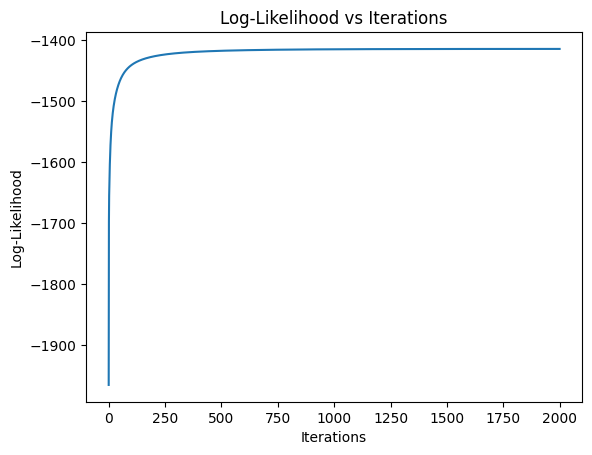

In [80]:
import matplotlib.pyplot as plt

# Initialize weights
weights = np.zeros(X.shape[1])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log-likelihood function
def log_likelihood(X, y, weights):
    z = np.dot(X, weights)
    return np.sum(y * z - np.log(1 + np.exp(z)))

# Gradient descent to optimize weights
def logistic_regression(X, y, weights, learning_rate=0.001, iterations=2000):
    log_likelihood_values = []
    for i in range(iterations):
        z = np.dot(X, weights)
        predictions = 1 / (1 + np.exp(-z))
        # Gradient calculation
        gradient = np.dot(X.T, y - predictions)
        # Update weights
        weights += learning_rate * gradient
        # Log-likelihood every iteration
        log_likelihood_values.append(log_likelihood(X, y, weights))
        # Log-likelihood every 100 iterations for monitoring
        if i % 100 == 0:
            print(f"Iteration {i}: Log-Likelihood = {log_likelihood(X, y, weights)}")
    return weights, log_likelihood_values

# Train the model
weights, log_likelihood_values = logistic_regression(X, y, weights)

# Print the final log-likelihood value
print(f"Final Log-Likelihood: {log_likelihood_values[-1]}")

# Plot log-likelihood vs iterations
plt.plot(log_likelihood_values)
plt.xlabel("Iterations")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood vs Iterations")
plt.show()

# Predictions
def predict(X, weights):
    return sigmoid(np.dot(X, weights)) >= 0.5



MODEL ACCURACY ON TRAIN SET

In [81]:
y_pred_train = predict(X_train, weights)
accuracy = np.mean(y_pred_train == y_train)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8596666666666667


MODEL ACCURACY ON TEST SET

In [82]:
y_pred_test = predict(X_test, weights)
accuracy = np.mean(y_pred_test == y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.833555259653795


In [83]:
y_pred_train[0:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [84]:
y_train[0:20]

,TenYearCHD
2532,0
546,0
2465,0
3741,0
1998,0
285,0
437,0
2397,0
2528,1
1798,0


In [85]:
y_pred_test[0:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [86]:
y_test[0:20]

,TenYearCHD
2435,0
1168,0
3761,0
496,0
3983,0
2099,1
102,0
1435,0
4053,0
1425,0


In [87]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,1.0,0.184211,0.0,0.000000,0.0,0.0,0.0,0.0,0.140652,0.106383,0.232804,0.277024,0.363636,0.104520
1,1.0,0.0,0.368421,0.0,0.000000,0.0,0.0,0.0,0.0,0.234991,0.177305,0.349206,0.319680,0.515152,0.101695
2,1.0,1.0,0.421053,1.0,0.285714,0.0,0.0,0.0,0.0,0.226415,0.208038,0.338624,0.237518,0.313131,0.084746
3,1.0,0.0,0.763158,1.0,0.428571,0.0,0.0,1.0,0.0,0.192110,0.314421,0.497354,0.316045,0.212121,0.177966
4,1.0,0.0,0.368421,1.0,0.328571,0.0,0.0,0.0,0.0,0.295026,0.219858,0.380952,0.183228,0.414141,0.127119


Checking the prediction by trained model on random selected input


In [88]:
X_new_pred= X.iloc[3,:]


In [89]:
y_new_pred = predict(X_new_pred, weights)
y_new_pred

False

In [90]:
y[3]

1

Prediction if disease occurs (yes,no)

In [91]:
def predict_yes_no(X_new_pred, weights):

  y_new_pred = predict(X_new_pred, weights)
  if y_new_pred:
    return "Yes" #if prediction is 1
  else:
    return "No" #if prediction is 0

# Example usage:
X_new_pred = X.iloc[3, :]  # Replace with your desired input
prediction = predict_yes_no(X_new_pred, weights)
print(f"Prediction: {prediction}")


Prediction: No
